(물론 설명과 프레젠테이션은 달라야 함 -> 글자 최대한 적게, 설명문은 나 따로)
# 기존, 충성 고객에 대한 리텐션 전략

## 리텐션의 개념과 리텐션의 중요성
얼마나 많은 유저가 제품으로 다시 돌아오는지를 측정한 것
제품에 활발하게 인게이지하는 충성 고객 기반을 쌓고 지속적인 성장을 이어가기 위해서는, 유저 리텐션을 높이고 이탈을 최소화하는 것이 핵심
예를 들어 고객 유치를 많이 했음, L.Point가입도 늘리고, Membership카드 발급도 많이 하고..그런데 그 고객들을 계속 붙잡아 둘 수 없다면?
핸드폰 앱은 엄청 많이 깔게 만들었는데, 사람들이 자기 핸드폰에서 그 앱을 대부분 더 이상 클릭하지 않는다면?
 그래서 HubSpot의 전 VP of Growth이며, Reforge 공동 창업자인 브라이언 밸푸어는 '리텐션이 왕(the King)'라고 이야기 합니다.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle

from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()

## 기존 고객에 대한 파악
### 
- 첫 고민은 매출 감소 고객을 위주로 타겟팅을 할 것인가, 매출 증가 고객을 위주로 타켓팅을 할 것인가
- 전년도 대비 매출이 증가한 고객과 감소한 고객의 인원수와 비율, 총매출액과 비율을 비교해봄

In [98]:
cursor.execute('''
SELECT 고객번호, sum(구매금액) 구매금액,
    SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 ELSE 0 END) "2014구매금액",
    SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 ELSE 0 END) "2015구매금액",
    SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END) - SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END) 증감액
FROM purprod
group by 고객번호
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [99]:
# 증감액이 플러스인 데이터 추출
plus_df = df[df['증감액'] > 0]

# 증감액이 마이너스인 데이터 추출
minus_df = df[df['증감액'] < 0]

# 총액 금액 계산
plus_total_amount = plus_df['구매금액'].sum()
minus_total_amount = minus_df['구매금액'].sum()

# 총액 비율 계산
total_amount = df['구매금액'].sum()
plus_ratio = (plus_total_amount / total_amount) * 100
minus_ratio = (minus_total_amount / total_amount) * 100

print("플러스 증감액 총액 금액:", plus_total_amount)
print("플러스 증감액 비율:", plus_ratio)
print("마이너스 증감액 총액 금액:", minus_total_amount)
print("마이너스 증감액 비율:", minus_ratio)

플러스 증감액 총액 금액: 369758311845
플러스 증감액 비율: 54.6156350310222
마이너스 증감액 총액 금액: 306831724643
마이너스 증감액 비율: 45.32098117125206


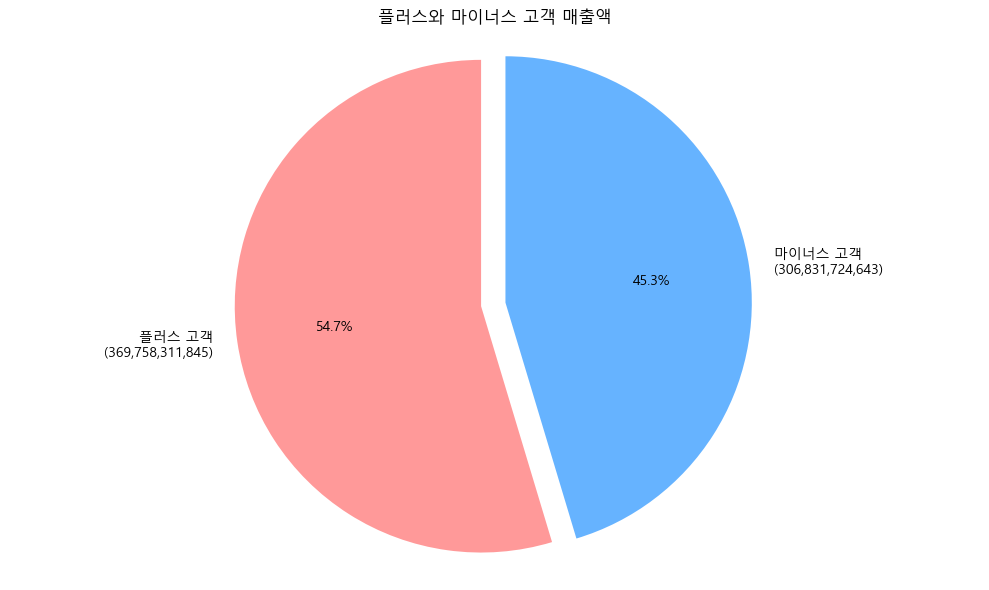

In [100]:
import matplotlib.pyplot as plt

# 총액 금액 계산
plus_total_amount = plus_df['구매금액'].sum()
minus_total_amount = minus_df['구매금액'].sum()

# 파이 차트 설정
labels = ['플러스 고객\n({:,})'.format(plus_total_amount), 
          '마이너스 고객\n({:,})'.format(minus_total_amount)]
sizes = [plus_total_amount, minus_total_amount]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# 매출액 파이 차트
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')
plt.title('플러스와 마이너스 고객 매출액')

plt.tight_layout()
plt.show()

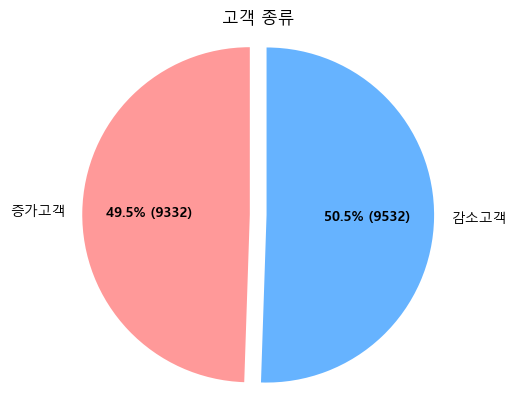

In [5]:
import matplotlib.pyplot as plt

# 데이터
labels = ['증가고객', '감소고객']
sizes = [9333, 9533]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # 증가고객에 대해 약간의 간격을 주기 위해 폭발 값을 설정합니다.

# 원형 그래프 생성
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                  autopct=lambda pct: f"{pct:.1f}% ({int(pct / 100 * sum(sizes))})",
                                  startangle=90)
ax.axis('equal')  # 원형 그래프를 원형으로 유지합니다.
ax.set_title('고객 종류')  # 그래프 제목

# 텍스트 스타일 조정
plt.setp(autotexts, size=10, weight='bold')

# 그래프 표시
plt.show()


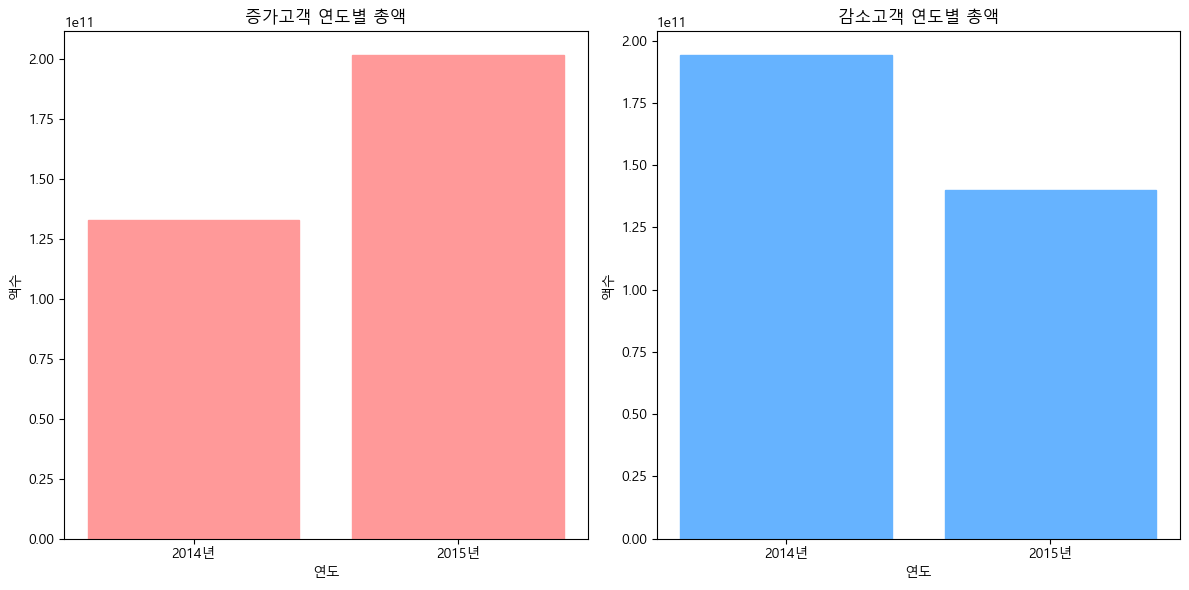

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
years = ['2014년', '2015년']
kind=['증가고객', '감소고객']
increase_values = [132814358160, 201475415859]
decrease_values = [194017992827, 140126782346]
growth_rates = [21.01, -16.49]

# 그래프 크기 및 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 그래프 - 2014년
x_pos1 = np.arange(len(years))
colors1 = ['#ff9999', '#ff9999']
bars1 = ax1.bar(x_pos1, [increase_values[0], increase_values[1]], color=colors1)
ax1.set_xlabel('연도')
ax1.set_ylabel('액수')
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(years)
ax1.set_title('증가고객 연도별 총액')


# 두 번째 그래프 - 2015년
x_pos2 = np.arange(len(years))
colors2 = ['#66b3ff', '#66b3ff']
bars2 = ax2.bar(x_pos2, [decrease_values[0], decrease_values[1]], color=colors2)
ax2.set_xlabel('연도')
ax2.set_ylabel('액수')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(years)
ax2.set_title('감소고객 연도별 총액')

# 증가고객과 감소고객에 색상 설정
for bar1, color1 in zip(bars1, colors1):
    bar1.set_color(color1)

for bar2, color2 in zip(bars2, colors2):
    bar2.set_color(color2)

# 그래프 표시
plt.tight_layout()
plt.show()

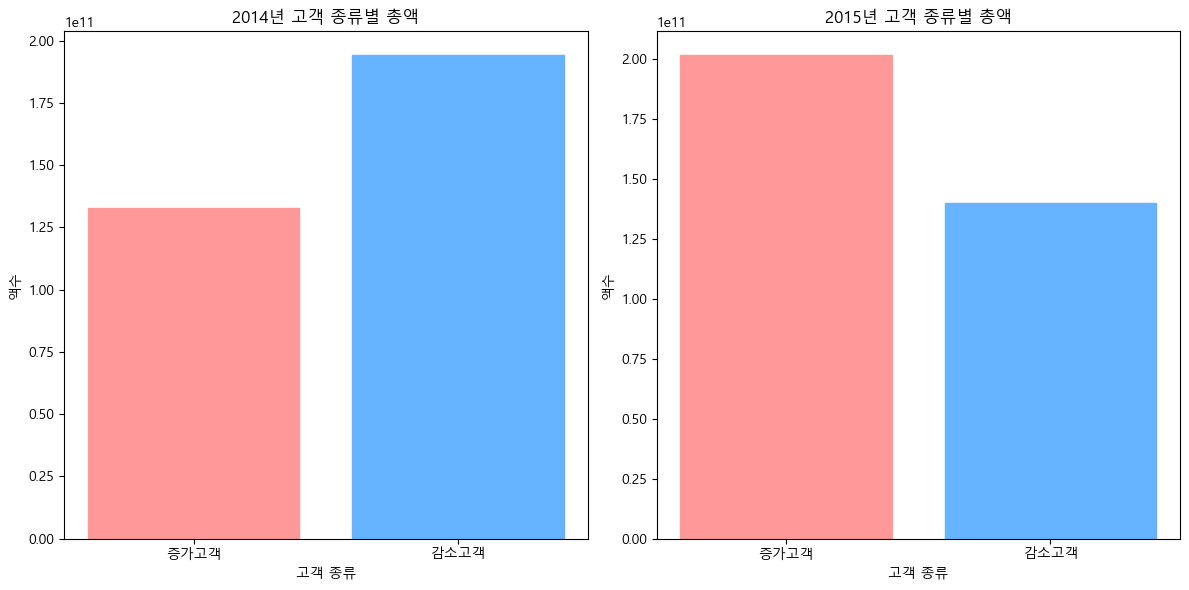

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
years = ['2014년', '2015년']
kind=['증가고객', '감소고객']
increase_values = [132814358160, 201475415859]
decrease_values = [194017992827, 140126782346]
growth_rates = [21.01, -16.49]

# 그래프 크기 및 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 그래프 - 2014년
x_pos1 = np.arange(len(years))
colors1 = ['#ff9999', '#66b3ff']
bars1 = ax1.bar(x_pos1, [increase_values[0], decrease_values[0]], color=colors1)
ax1.set_xlabel('고객 종류')
ax1.set_ylabel('액수')
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(kind)
ax1.set_title('2014년 고객 종류별 총액')


# 두 번째 그래프 - 2015년
x_pos2 = np.arange(len(years))
colors2 = ['#ff9999', '#66b3ff']
bars2 = ax2.bar(x_pos2, [increase_values[1], decrease_values[1]], color=colors2)
ax2.set_xlabel('고객 종류')
ax2.set_ylabel('액수')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(kind)
ax2.set_title('2015년 고객 종류별 총액')

# 증가고객과 감소고객에 색상 설정
for bar1, color1 in zip(bars1, colors1):
    bar1.set_color(color1)

for bar2, color2 in zip(bars2, colors2):
    bar2.set_color(color2)

# 그래프 표시
plt.tight_layout()
plt.show()
#'top', 'bottom', 'center', 'baseline', 'center_baseline'

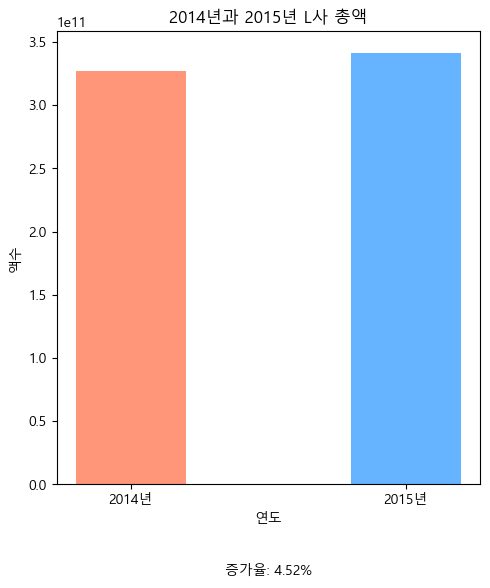

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
years = ['2014년', '2015년']
values = [326832350987, 341602198206]
growth_rates = [4.52]

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(5, 6))

# 막대 너비 설정
bar_width = 0.4

# colors2 = ['#ff9999', '#66b3ff']
# bars2 = ax2.bar(x_pos2, [increase_values[1], decrease_values[1]], color=colors2)

# 막대 그래프
x_pos = np.arange(len(years))
colors2 = ['#ff9579', '#66b3ff']
bars = ax.bar(x_pos, values, width=bar_width, color=colors2)

# 증가율 표시
ax.text(0.5, -0.2, f'증가율: {growth_rates[0]:.2f}%', transform=ax.transAxes, ha='center')

# 축 설정
ax.set_xlabel('연도')
ax.set_ylabel('액수')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.set_title('2014년과 2015년 L사 총액')

# 그래프 사이 간격 조정
plt.subplots_adjust(wspace=100)

# 그래프 표시
plt.tight_layout()
plt.show()


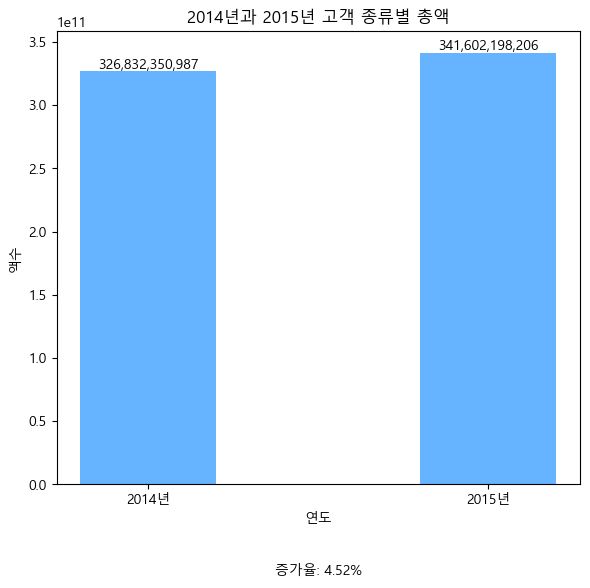

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
years = ['2014년', '2015년']
values = [326832350987, 341602198206]
growth_rates = [4.52]

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(6, 6))

# 막대 너비 설정
bar_width = 0.4

# 막대 그래프
x_pos = np.arange(len(years))
bars = ax.bar(x_pos, values, width=bar_width, color='#66b3ff')

# 값 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}', ha='center', va='bottom')

# 증가율 표시
ax.text(0.5, -0.2, f'증가율: {growth_rates[0]:.2f}%', transform=ax.transAxes, ha='center')

# 축 설정
ax.set_xlabel('연도')
ax.set_ylabel('액수')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.set_title('2014년과 2015년 고객 종류별 총액')

# 그래프 표시
plt.tight_layout()
plt.show()


In [101]:
# 증감액이 플러스인 데이터 추출
plus_df = df[df['증감액'] > 0]

# 증감액이 마이너스인 데이터 추출
minus_df = df[df['증감액'] < 0]

# 플러스 증감액 고객 수
plus_customer_count = len(plus_df)

# 마이너스 증감액 고객 수
minus_customer_count = len(minus_df)

print("플러스 증감액 고객 수:", plus_customer_count)
print("마이너스 증감액 고객 수:", minus_customer_count)

플러스 증감액 고객 수: 10706
마이너스 증감액 고객 수: 8617


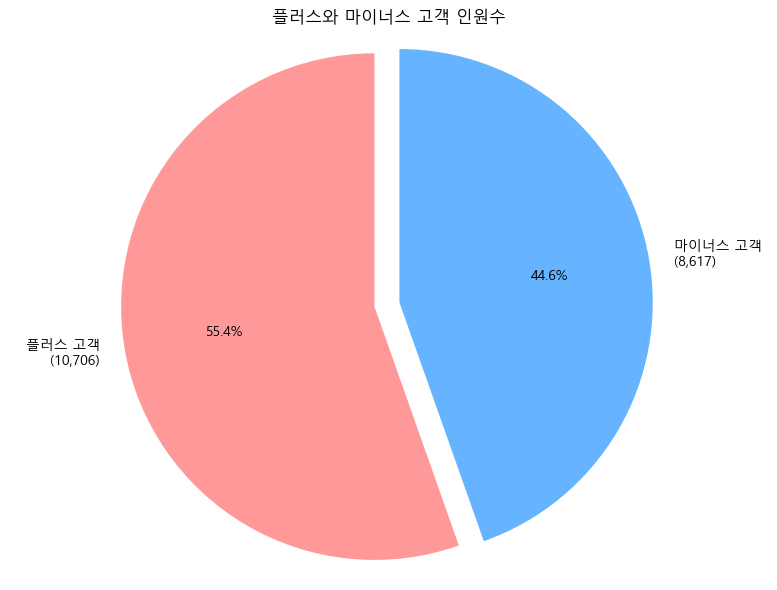

In [102]:
import matplotlib.pyplot as plt

# 증감액이 플러스인 데이터 추출
plus_df = df[df['증감액'] > 0]

# 증감액이 마이너스인 데이터 추출
minus_df = df[df['증감액'] < 0]

# 플러스 증감액 고객 수
plus_customer_count = len(plus_df)

# 마이너스 증감액 고객 수
minus_customer_count = len(minus_df)

# 파이 차트 설정
labels = ['플러스 고객\n({:,})'.format(plus_customer_count), 
          '마이너스 고객\n({:,})'.format(minus_customer_count)]
sizes = [plus_customer_count, minus_customer_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# 매출액 파이 차트
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')
plt.title('플러스와 마이너스 고객 인원수')

plt.tight_layout()
plt.show()


#### 전년도 대비 매출이 플러스인 고객과 마이너스인 고객의 비율이 크게 차이가 나지 않음을 알 수 있었음
- 일단 전체를 다 가져 가기로 함

## 기존 고객을 어떻게 나눌 것인가

In [5]:
cursor.execute('''
select *
from hgroup
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [6]:
df.대그룹.unique()

array(['기존고객', '신규고객', '재진입고객', '이탈고객'], dtype=object)

In [64]:
import pandas as pd

# Calculate the count of each group
grouped_count = df['대그룹'].value_counts()

# Calculate the percentage of each group
grouped_percentage = grouped_count / grouped_count.sum() * 100

# Create a DataFrame with count and percentage columns
count_df = pd.DataFrame({'Count': grouped_count, 'Percentage': grouped_percentage})

# Sort the DataFrame by count in descending order
count_df = count_df.sort_values('Count', ascending=False)

# Add a new column with formatted percentage values
count_df['Percentage'] = count_df['Percentage'].map('{:.2f}%'.format)

# Display the DataFrame
count_df

,Count,Percentage
기존고객,19147,98.78%
신규고객,166,0.86%
이탈고객,37,0.19%
재진입고객,33,0.17%


In [85]:
import pandas as pd

# Calculate the total sum of '전체총액' for each group
grouped_total = df.groupby('대그룹')['전체총액'].sum()

# Calculate the percentage of each group's total sum
total_sum = grouped_total.sum()
grouped_percentage = (grouped_total / total_sum) * 100

# Create a DataFrame with the total sum and percentage columns
total_df = pd.DataFrame({'전체총액': grouped_total, '비율(%)': grouped_percentage})

# Sort the DataFrame by '전체총액' in descending order
total_df = total_df.sort_values('전체총액', ascending=False)

# Display the DataFrame
total_df

,전체총액,비율(%)
대그룹,,
기존고객,673573712456,99.49
신규고객,3192525318,0.47
이탈고객,139913151,0.02
재진입고객,113006016,0.02


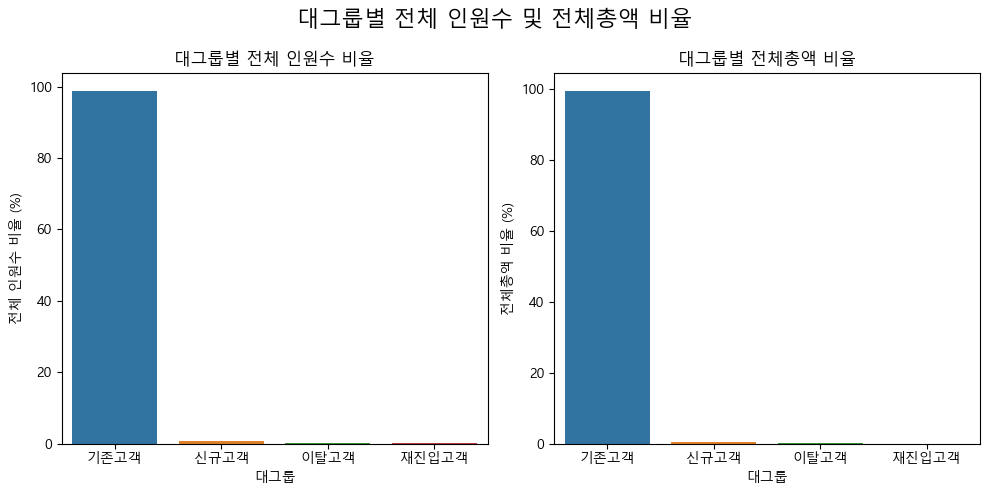

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 대그룹별 전체 인원수 계산
grouped_count = df['대그룹'].value_counts()

# 전체 인원수 비율 계산
total_count = grouped_count.sum()
grouped_ratio = grouped_count / total_count * 100

# 대그룹별 전체총액 합계 계산
grouped_total = df.groupby('대그룹')['전체총액'].sum()

# 대그룹별 전체총액 비율 계산
total_sum = grouped_total.sum()
grouped_ratio_total = grouped_total / total_sum * 100

# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 왼쪽 바 차트 - 대그룹별 전체 인원수 비율
sns.barplot(x=grouped_ratio.index, y=grouped_ratio.values, ax=axes[0])
axes[0].set_title('대그룹별 전체 인원수 비율')
axes[0].set_xlabel('대그룹')
axes[0].set_ylabel('전체 인원수 비율 (%)')

# 오른쪽 바 차트 - 대그룹별 전체총액 비율
sns.barplot(x=grouped_ratio_total.index, y=grouped_ratio_total.values, ax=axes[1])
axes[1].set_title('대그룹별 전체총액 비율')
axes[1].set_xlabel('대그룹')
axes[1].set_ylabel('전체총액 비율 (%)')

# 전체 제목
fig.suptitle('대그룹별 전체 인원수 및 전체총액 비율', fontsize=16)

plt.tight_layout()
plt.show()


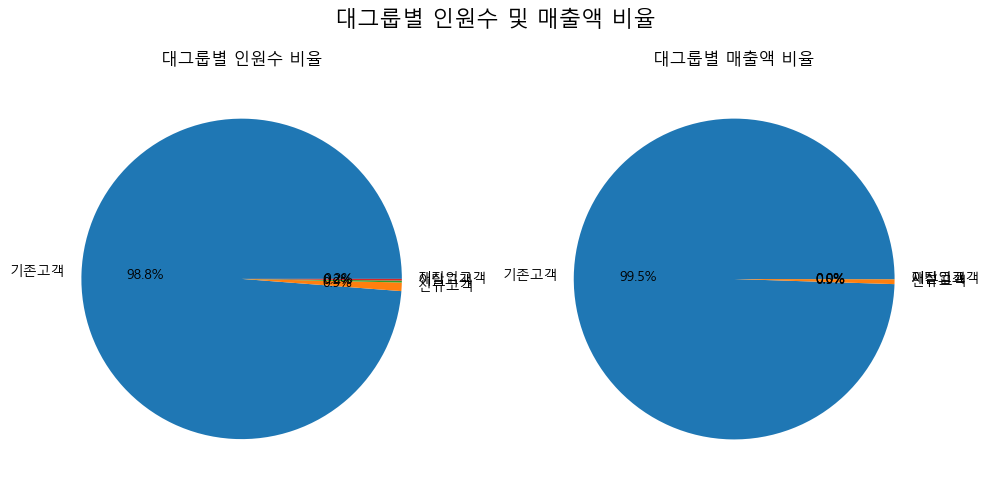

In [9]:
import matplotlib.pyplot as plt

# 대그룹별 인원수 계산
grouped_count = df['대그룹'].value_counts()

# 대그룹별 전체총액 합계 계산
grouped_total = df.groupby('대그룹')['전체총액'].sum()

# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 왼쪽 파이차트 - 대그룹별 인원수 비율
axes[0].pie(grouped_count, labels=grouped_count.index, autopct='%1.1f%%')
axes[0].axis('equal')
axes[0].set_title('대그룹별 인원수 비율')

# 오른쪽 파이차트 - 대그룹별 매출액 비율
axes[1].pie(grouped_total, labels=grouped_total.index, autopct='%1.1f%%')
axes[1].axis('equal')
axes[1].set_title('대그룹별 매출액 비율')

# 전체 제목
fig.suptitle('대그룹별 인원수 및 매출액 비율', fontsize=16)

plt.tight_layout()
plt.show()

### 기존, 충성 고객 타겟팅 확정
- 

In [11]:
# 나중에 분석해 보기

df.중그룹.unique()

array(['증감증', '감감증', '증증감', '감증감', '증증증', '증감감', '감감감', '감증증', '0증증',
       '00증', '감0증', '0증감', '감감0', '감00', '증감0'], dtype=object)

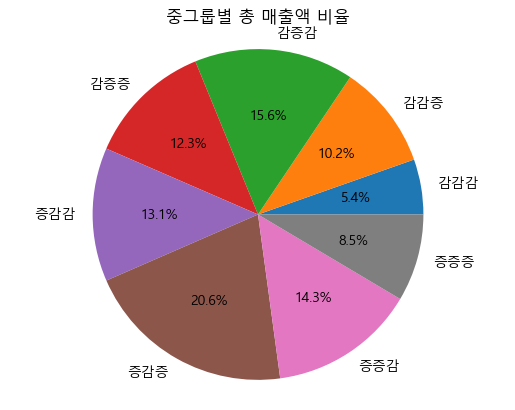

In [12]:
import matplotlib.pyplot as plt

# Filter the dataframe for 중그룹 values without '0'
filtered_df = df[~df['중그룹'].str.contains('0')]

# Calculate the total sales for the filtered 중그룹 values
grouped = filtered_df.groupby('중그룹').sum()
sales = grouped[['14년상반기', '14년하반기', '15년상반기', '15년하반기']].sum(axis=1)

# Pie chart
plt.pie(sales, labels=grouped.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('중그룹별 총 매출액 비율')
plt.show()

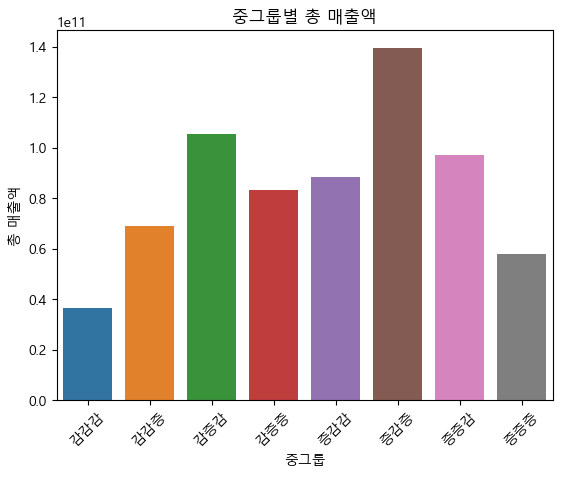

In [14]:
import seaborn as sns

# Filter the dataframe for 중그룹 values without '0'
filtered_df = df[~df['중그룹'].str.contains('0')]

# Calculate the total sales for the filtered 중그룹 values
grouped = filtered_df.groupby('중그룹').sum()
sales = grouped[['14년상반기', '14년하반기', '15년상반기', '15년하반기']].sum(axis=1)

# Create a bar plot
sns.barplot(x=sales.index, y=sales.values)
plt.title('중그룹별 총 매출액')
plt.xlabel('중그룹')
plt.ylabel('총 매출액')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


## 전체

In [46]:
cursor.execute('''
SELECT H.중그룹, D.QYEAR, D.대분류코드, SUM(D.구매금액) AS 총구매액
FROM HGROUP H, DEMOPURPROD D
WHERE H.고객번호 = D.고객번호 AND D.제휴사='A'
GROUP BY H.중그룹, D.QYEAR, D.대분류코드
ORDER BY D.대분류코드, QYEAR
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [49]:
df

,중그룹,QYEAR,대분류코드,총구매액
0,감00,20141Q,1,8500
1,감0증,20141Q,1,12500
2,감감0,20141Q,1,427420
3,감감감,20141Q,1,758891470
4,감감증,20141Q,1,986134450
...,...,...,...,...
707,감증증,20154Q,9,851121340
708,증감감,20154Q,9,347261390
709,증감증,20154Q,9,1459644130
710,증증감,20154Q,9,535094780


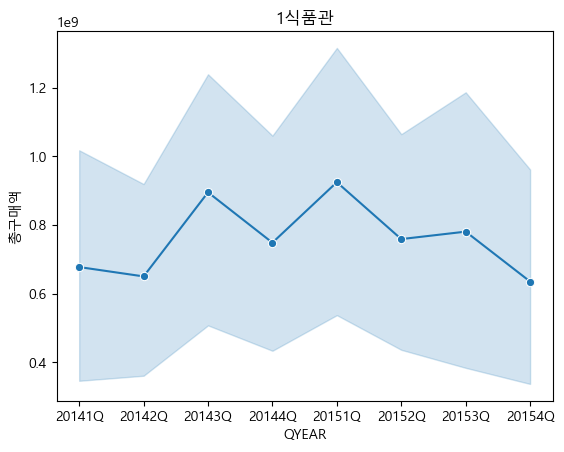

In [48]:
filtered_df = df[df['대분류코드'] == 1]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('1식품관')
plt.show()

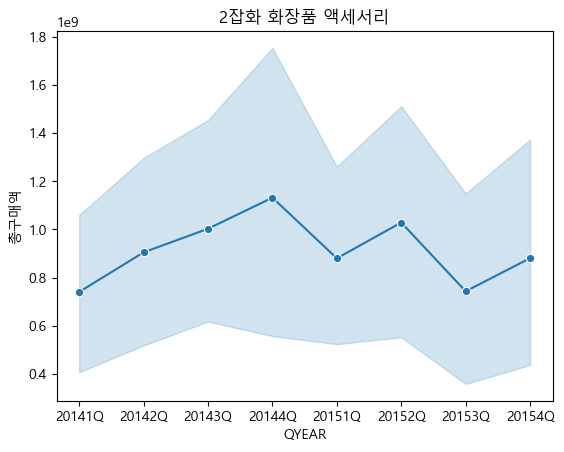

In [51]:
filtered_df = df[df['대분류코드'] == 2]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('2잡화 화장품 액세서리')
plt.show()

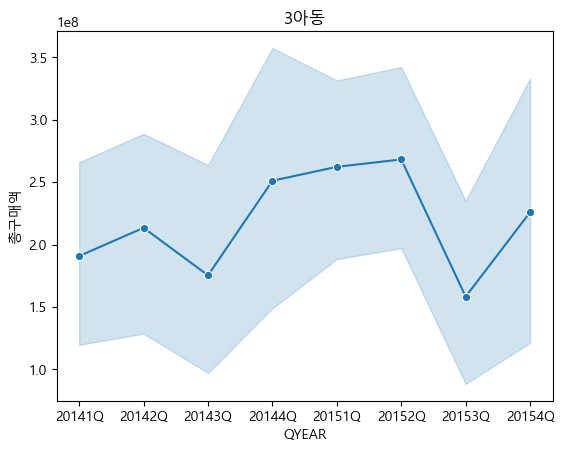

In [52]:
filtered_df = df[df['대분류코드'] == 3]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('3아동')
plt.show()

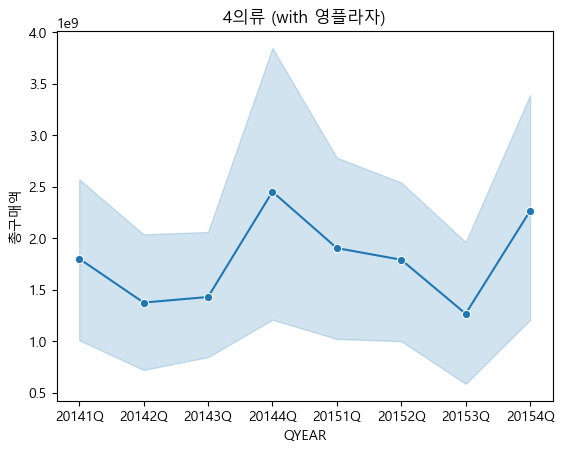

In [53]:
filtered_df = df[df['대분류코드'] == 4]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('4의류 (with 영플라자)')
plt.show()

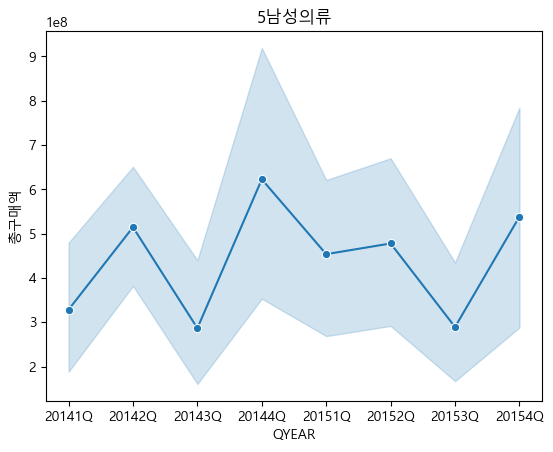

In [54]:
filtered_df = df[df['대분류코드'] == 5]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('5남성의류')
plt.show()

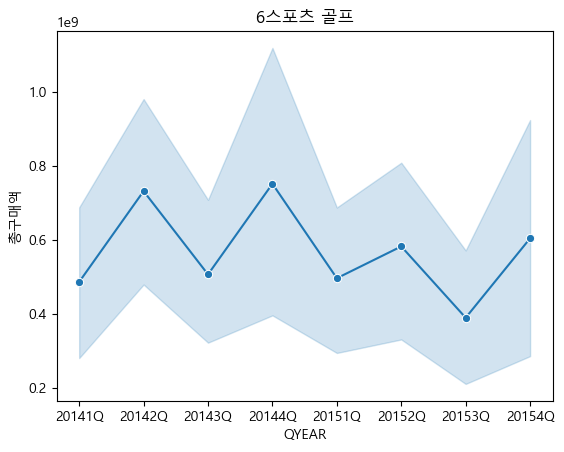

In [55]:
filtered_df = df[df['대분류코드'] == 6]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('6스포츠 골프')
plt.show()

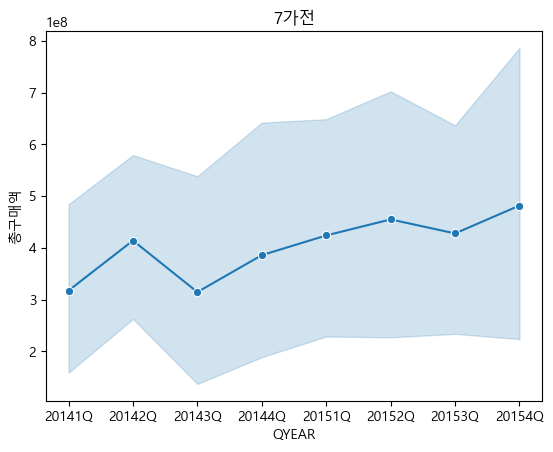

In [56]:
filtered_df = df[df['대분류코드'] == 7]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('7가전')
plt.show()

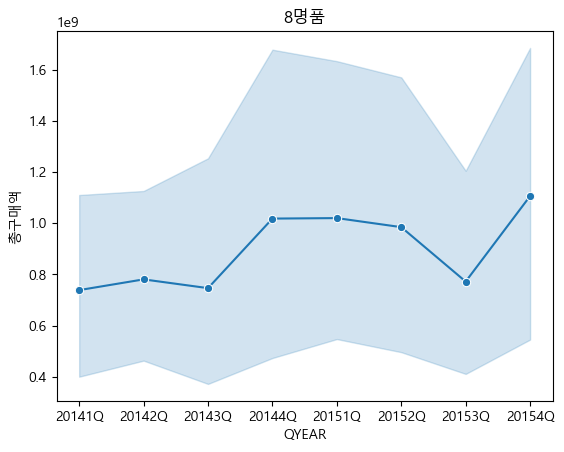

In [57]:
filtered_df = df[df['대분류코드'] == 8]

sns.lineplot(x='QYEAR', y='총구매액', data=filtered_df, marker='o')

plt.title('8명품')
plt.show()

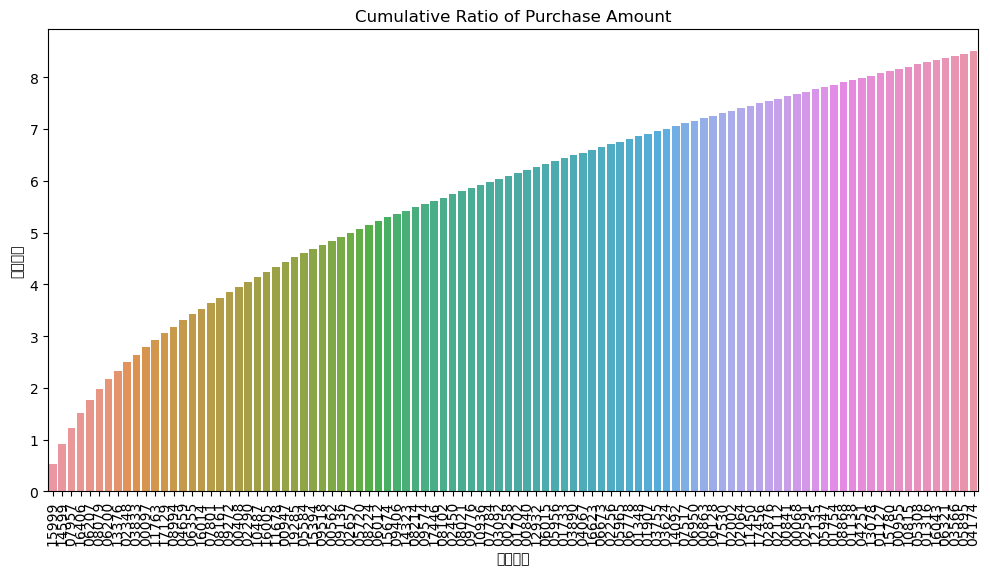

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 누적비율 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted.head(100), x='고객번호', y='누적비율')
plt.title('Cumulative Ratio of Purchase Amount')
plt.xlabel('고객번호')
plt.ylabel('누적비율')
plt.xticks(rotation=90)
plt.show()


In [13]:
cursor.execute('''
SELECT
    SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 ELSE 0 END) "2014구매금액",
    SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 ELSE 0 END) "2015구매금액"
FROM purprod
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_sales = pd.DataFrame(x, columns=col_names)

In [14]:
df_sales

,2014구매금액,2015구매금액
0,329601840581,347417316360


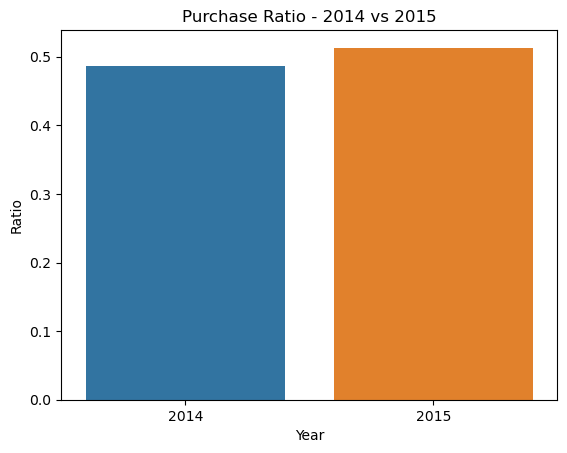

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2014 구매금액과 2015 구매금액 추출
purchase_2014 = df_sales['2014구매금액'].values[0]
purchase_2015 = df_sales['2015구매금액'].values[0]

# 비율 계산
total_purchase = purchase_2014 + purchase_2015
purchase_2014_ratio = purchase_2014 / total_purchase
purchase_2015_ratio = purchase_2015 / total_purchase

# 시각화
sns.barplot(x=['2014', '2015'], y=[purchase_2014_ratio, purchase_2015_ratio])
plt.title('Purchase Ratio - 2014 vs 2015')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.show()

### 반기

In [3]:
cursor.execute('''
SELECT 고객번호, 대분류코드, 구매일자,
    sum(구매금액) 구매금액,
    SUM(CASE WHEN 구매일자 between 20140101 and 20140630 THEN 구매금액 ELSE 0 END) "2014_h1",
    SUM(CASE WHEN 구매일자 between 20140701 and 20141231 THEN 구매금액 ELSE 0 END) "2014_h2",
    SUM(CASE WHEN 구매일자 between 20150101 and 20150630 THEN 구매금액 ELSE 0 END) "2015_h1",
    SUM(CASE WHEN 구매일자 between 20150701 and 20151231 THEN 구매금액 ELSE 0 END) "2015_h2"
FROM purprod
group by 고객번호, 대분류코드, 구매일자
order by 구매금액 desc
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_half_sales = pd.DataFrame(x, columns=col_names)

,고객번호,대분류코드,구매일자,구매금액,2014_h1,2014_h2,2015_h1,2015_h2
0,17129,4,20141018,306668660,0,306668660,0,0
1,08994,4,20141030,268277070,0,268277070,0,0
2,14599,4,20141121,245009800,0,245009800,0,0
3,17446,2,20140629,205688000,205688000,0,0,0
4,16014,2,20141031,176289200,0,176289200,0,0
...,...,...,...,...,...,...,...,...
19782158,01560,6,20140806,10,0,10,0,0
19782159,07914,1,20150601,10,0,0,10,0
19782160,09264,5,20151215,10,0,0,0,10
19782161,11295,34,20140718,10,0,10,0,0


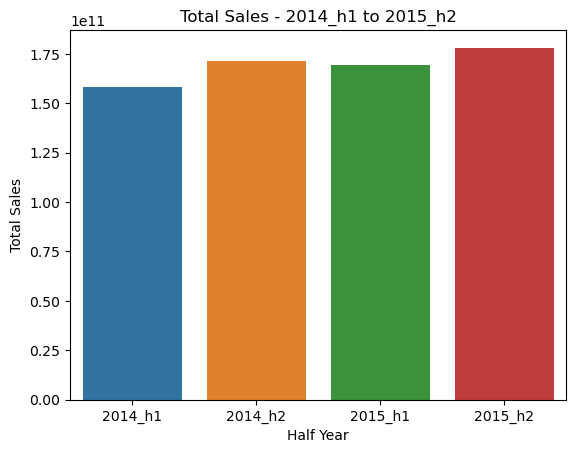

In [6]:
# 각 반기별 총 매출액 계산
total_sales_2014_h1 = df_half_sales['2014_h1'].sum()
total_sales_2014_h2 = df_half_sales['2014_h2'].sum()
total_sales_2015_h1 = df_half_sales['2015_h1'].sum()
total_sales_2015_h2 = df_half_sales['2015_h2'].sum()

# 시각화
sns.barplot(x=['2014_h1', '2014_h2', '2015_h1', '2015_h2'], y=[total_sales_2014_h1, total_sales_2014_h2, total_sales_2015_h1, total_sales_2015_h2])
plt.title('Total Sales - 2014_h1 to 2015_h2')
plt.xlabel('Half Year')
plt.ylabel('Total Sales')
plt.show()


In [8]:
cursor.execute('''
SELECT 고객번호, 대분류코드,
    sum(구매금액) 구매금액,
    SUM(CASE WHEN 구매일자 between 20140101 and 20140331 THEN 구매금액 ELSE 0 END) "2014_q1",
    SUM(CASE WHEN 구매일자 between 20140401 and 20140630 THEN 구매금액 ELSE 0 END) "2014_q2",
    SUM(CASE WHEN 구매일자 between 20140701 and 20140930 THEN 구매금액 ELSE 0 END) "2014_q3",
    SUM(CASE WHEN 구매일자 between 20141001 and 20141231 THEN 구매금액 ELSE 0 END) "2014_q4",
    SUM(CASE WHEN 구매일자 between 20150101 and 20150331 THEN 구매금액 ELSE 0 END) "2015_q1",
    SUM(CASE WHEN 구매일자 between 20150401 and 20150630 THEN 구매금액 ELSE 0 END) "2015_q2",
    SUM(CASE WHEN 구매일자 between 20150701 and 20150930 THEN 구매금액 ELSE 0 END) "2015_q3",
    SUM(CASE WHEN 구매일자 between 20151001 and 20151231 THEN 구매금액 ELSE 0 END) "2015_q4"
FROM purprod
group by 고객번호, 대분류코드
order by 구매금액 desc
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_quarter_sales = pd.DataFrame(x, columns=col_names)

In [5]:
df_quarter_sales

,고객번호,대분류코드,구매금액,2014_q1,2014_q2,2014_q3,2014_q4,2015_q1,2015_q2,2015_q3,2015_q4
0,15999,4,3098418020,431102360,267280150,247365430,204481760,390642140,574368700,326003900,657173580
1,14599,4,2459443370,56050,12000000,10365800,1287777640,285131360,215045300,259026840,390040380
2,07957,12,2086956350,539774710,834583660,604728120,79008880,28860980,0,0,0
3,16406,4,1740470740,12633260,190970,435100,15003900,183912900,436183800,260569890,831540920
4,06200,4,1239454420,10070780,3057160,24800,14090600,163405150,78710050,612561160,357534720
...,...,...,...,...,...,...,...,...,...,...,...
910416,02090,17,50,50,0,0,0,0,0,0,0
910417,08786,17,50,0,0,50,0,0,0,0,0
910418,10557,71,40,0,0,0,40,0,0,0,0
910419,01344,51,30,0,30,0,0,0,0,0,0


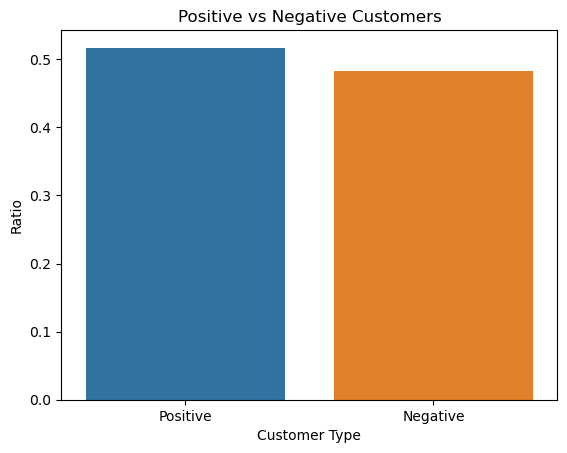

In [10]:

# 2014_q2와 2014_q1을 뺀 금액 계산
df_quarter_sales['diff'] = df_quarter_sales['2014_q2'] - df_quarter_sales['2014_q1']

# 양수인 고객과 음수인 고객 수 계산
positive_count = df_quarter_sales[df_quarter_sales['diff'] > 0]['고객번호'].count()
negative_count = df_quarter_sales[df_quarter_sales['diff'] < 0]['고객번호'].count()

# 비율 계산
total_count = positive_count + negative_count
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

# 시각화
sns.barplot(x=['Positive', 'Negative'], y=[positive_ratio, negative_ratio])
plt.title('Positive vs Negative Customers')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.show()

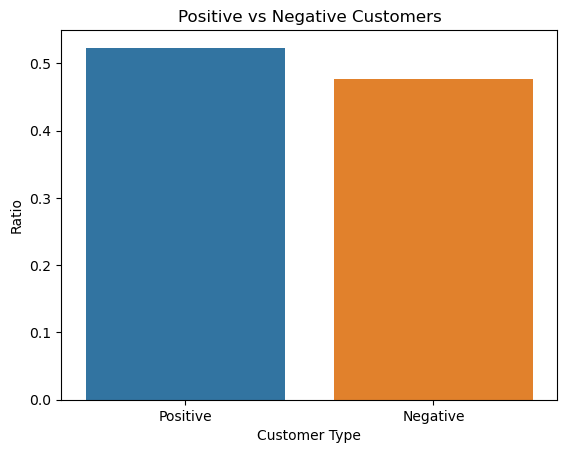

In [9]:
df_quarter_sales['diff'] = df_quarter_sales['2014_q3'] - df_quarter_sales['2014_q2']

positive_count = df_quarter_sales[df_quarter_sales['diff'] > 0]['고객번호'].count()
negative_count = df_quarter_sales[df_quarter_sales['diff'] < 0]['고객번호'].count()

total_count = positive_count + negative_count
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

sns.barplot(x=['Positive', 'Negative'], y=[positive_ratio, negative_ratio])
plt.title('Positive vs Negative Customers')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.show()

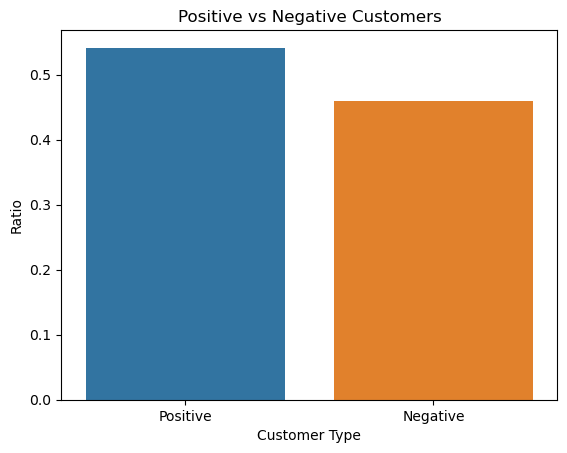

In [10]:
df_quarter_sales['diff'] = df_quarter_sales['2014_q4'] - df_quarter_sales['2014_q3']

positive_count = df_quarter_sales[df_quarter_sales['diff'] > 0]['고객번호'].count()
negative_count = df_quarter_sales[df_quarter_sales['diff'] < 0]['고객번호'].count()

total_count = positive_count + negative_count
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

sns.barplot(x=['Positive', 'Negative'], y=[positive_ratio, negative_ratio])
plt.title('Positive vs Negative Customers')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.show()

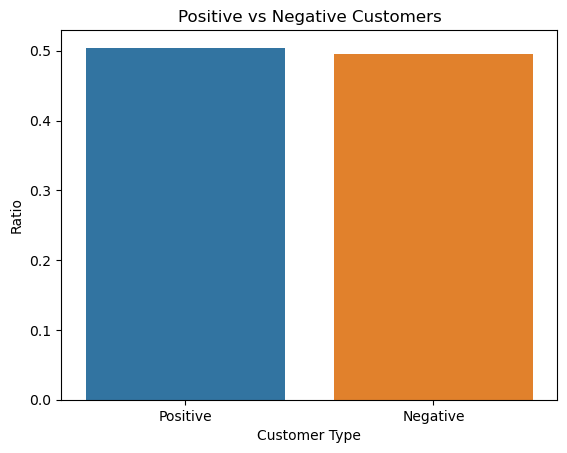

In [11]:
df_quarter_sales['diff'] = df_quarter_sales['2015_q1'] - df_quarter_sales['2014_q4']

positive_count = df_quarter_sales[df_quarter_sales['diff'] > 0]['고객번호'].count()
negative_count = df_quarter_sales[df_quarter_sales['diff'] < 0]['고객번호'].count()

total_count = positive_count + negative_count
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

sns.barplot(x=['Positive', 'Negative'], y=[positive_ratio, negative_ratio])
plt.title('Positive vs Negative Customers')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.show()

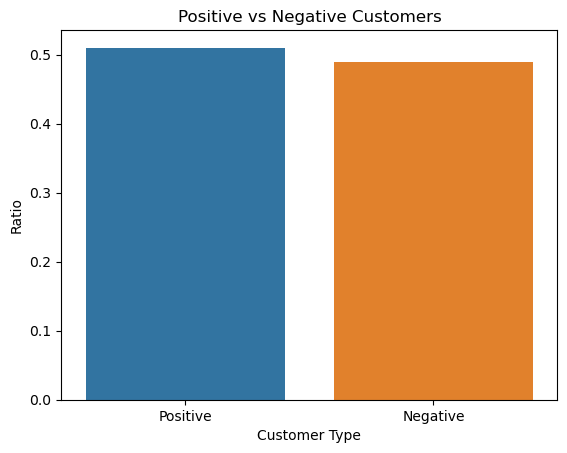

In [12]:
df_quarter_sales['diff'] = df_quarter_sales['2015_q2'] - df_quarter_sales['2015_q1']

positive_count = df_quarter_sales[df_quarter_sales['diff'] > 0]['고객번호'].count()
negative_count = df_quarter_sales[df_quarter_sales['diff'] < 0]['고객번호'].count()

total_count = positive_count + negative_count
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

sns.barplot(x=['Positive', 'Negative'], y=[positive_ratio, negative_ratio])
plt.title('Positive vs Negative Customers')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.show()

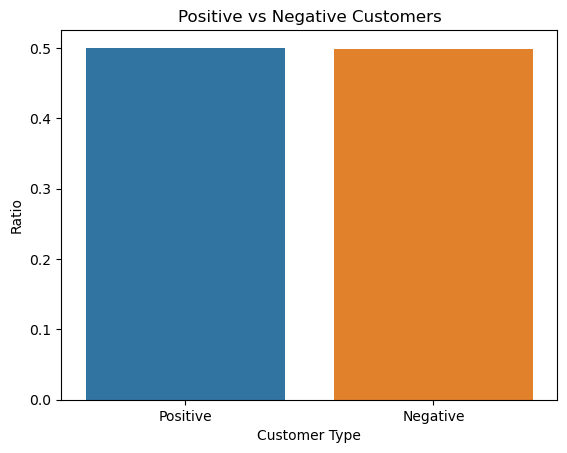

In [15]:
df_quarter_sales['diff'] = df_quarter_sales['2015_q3'] - df_quarter_sales['2015_q2']

positive_count = df_quarter_sales[df_quarter_sales['diff'] > 0]['고객번호'].count()
negative_count = df_quarter_sales[df_quarter_sales['diff'] < 0]['고객번호'].count()

total_count = positive_count + negative_count
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

sns.barplot(x=['Positive', 'Negative'], y=[positive_ratio, negative_ratio])
plt.title('Positive vs Negative Customers')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.show()

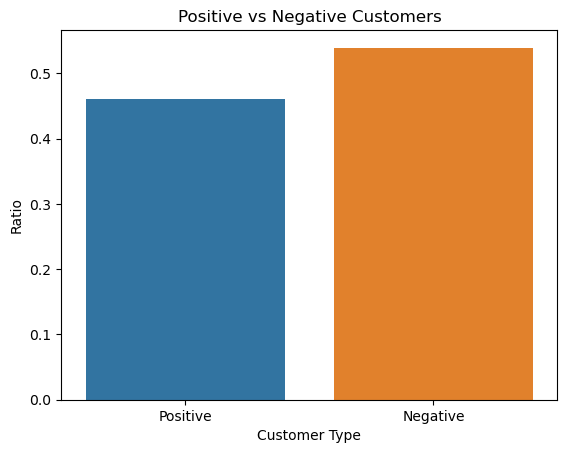

In [20]:
df_quarter_sales['diff'] = df_quarter_sales['2015_q4'] - df_quarter_sales['2015_q3']

positive_count = df_quarter_sales[df_quarter_sales['diff'] > 0]['고객번호'].count()
negative_count = df_quarter_sales[df_quarter_sales['diff'] < 0]['고객번호'].count()

total_count = positive_count + negative_count
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

sns.barplot(x=['Positive', 'Negative'], y=[positive_ratio, negative_ratio])
plt.title('Positive vs Negative Customers')
plt.xlabel('Customer Type')
plt.ylabel('Ratio')
plt.show()

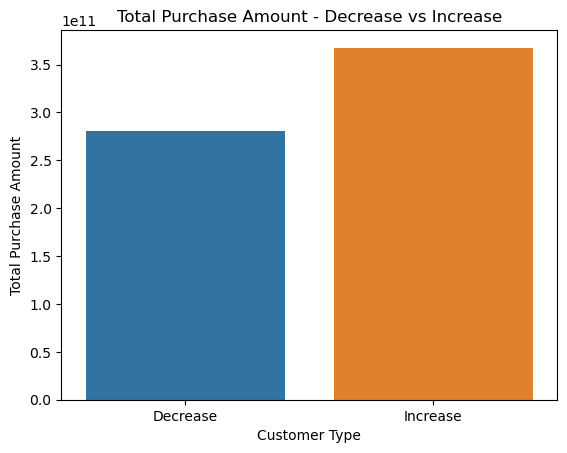

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 구매 감소 고객과 구매 증가 고객의 금액합계 계산
decrease_amount = df_quarter_sales[df_quarter_sales['diff'] < 0]['구매금액'].sum()
increase_amount = df_quarter_sales[df_quarter_sales['diff'] > 0]['구매금액'].sum()

# 시각화
sns.barplot(x=['Decrease', 'Increase'], y=[decrease_amount, increase_amount])
plt.title('Total Purchase Amount - Decrease vs Increase')
plt.xlabel('Customer Type')
plt.ylabel('Total Purchase Amount')
plt.show()


In [2]:
# 제휴사별 분기별 매출 현황

cursor.execute('''
select 고객번호,
  SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END) AS "2014년", 
  SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END) AS "2015년",
  SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END) - SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END) AS 증감액,
  TO_CHAR((SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END) - SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END)) / SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END) * 100, 'FM999,999,999.9') || '%' AS 증감율
FROM purprod1
where 제휴사='B'
group by 고객번호
--order by (SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END) - SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END)) / SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END) * 100;
order by "2014년" desc nulls last
''')

x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_demo = pd.DataFrame(x, columns=col_names)

In [4]:
df_demo.head(10)

,고객번호,2014년,2015년,증감액,증감율
0,07957,2.097600e+09,30284580.0,-2.067315e+09,-98.6%
1,06207,9.348479e+08,3535122.0,-9.313127e+08,-99.6%
2,11763,5.696042e+08,316567677.0,-2.530365e+08,-44.4%
3,09272,4.362416e+08,555599.0,-4.356860e+08,-99.9%
4,10487,2.523286e+08,95824910.0,-1.565037e+08,-62.%
5,08634,2.031576e+08,11157950.0,-1.919996e+08,-94.5%
6,08214,1.597769e+08,23802990.0,-1.359739e+08,-85.1%
7,00068,1.543407e+08,84287205.0,-7.005348e+07,-45.4%
8,09776,1.505152e+08,16267235.0,-1.342479e+08,-89.2%
9,05916,1.219405e+08,45554172.0,-7.638629e+07,-62.6%


In [ ]:

df_ = df_quarter.loc[df_quarter['제휴사'] == 'A']


In [ ]:
# 제휴사 A 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_a.columns[1:], df_a.values[0][1:], marker='o', label='A')
plt.axvline(x='2015_Q1', color='green', linestyle='--')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales')
plt.legend()
plt.show()

In [48]:
# 연령대별 전년도 대비 매출 추이
# 25~29세 연령대의 매출액 증가율이 43%임

cursor.execute('''select 연령대, sum(구매금액), sum("2014구매금액") "2014구매금액", sum("2015구매금액") "2015구매금액",
sum("2015구매금액") - sum("2014구매금액") 전년도_대비_매출액,
round((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 2) AS 증감율
from year_pur_demo where 제휴사='A' group by 연령대 order by 증감율 desc''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_age_sales = pd.DataFrame(x, columns=col_names)

In [49]:
df_age_sales

,연령대,SUM(구매금액),2014구매금액,2015구매금액,전년도_대비_매출액,증감율
0,25세~29세,14356398410,5669289450,8687108960,3017819510,53.23
1,40세~44세,90330305970,42615054440,47715251530,5100197090,11.97
2,55세~59세,61328413510,29769039590,31559373920,1790334330,6.01
3,50세~54세,84081491690,40952205730,43129285960,2177080230,5.32
4,35세~39세,75232994630,36758469370,38474525260,1716055890,4.67
5,45세~49세,95546074640,46785998660,48760075980,1974077320,4.22
6,30세~34세,38664528530,18958147270,19706381260,748233990,3.95
7,20세~24세,2667040490,1309719090,1357321400,47602310,3.63
8,60세이상,52591793070,26262980630,26328812440,65831810,0.25
9,19세이하,42103090,26805970,15297120,-11508850,-42.93


In [128]:
# 25~29 연령대의 백화점 증가율이 인상적임
cursor.execute('''
select 제휴사, sum("2014구매금액") "2014구매금액", sum("2015구매금액") "2015구매금액",
TO_CHAR((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 'FM999,999,999.9') || '%' AS 증감율
from year_pur_demo where 연령대 = '25세~29세' group by 제휴사 order by 제휴사
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_2529age_sales = pd.DataFrame(x, columns=col_names)

In [129]:
df_2529age_sales

,제휴사,2014구매금액,2015구매금액,증감율
0,A,5669289450,8687108960,53.2%
1,B,1493185265,1655476477,10.9%
2,C,402376724,445869117,10.8%
3,D,95145950,176528730,85.5%


In [9]:
# 25~29 연령대 A제휴사 구매품목 분석
cursor.execute('''
select 중분류코드, sum(구매금액), sum("2014구매금액"), sum("2015구매금액"),
   CASE WHEN SUM("2014구매금액") = 0 THEN 0
        ELSE round((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 2)
   END AS 증감율
from year_pur_demo where 연령대 = '25세~29세'and 제휴사 = 'A' group by 중분류코드 order by sum(구매금액) desc
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_2529age_sales_a = pd.DataFrame(x, columns=col_names)

In [11]:
df_2529age_sales_a[:10]

,중분류코드,SUM(구매금액),"SUM(""2014구매금액"")","SUM(""2015구매금액"")",증감율
0,0402,4430463720,1381485280,3048978440,120.70
1,0801,2533086850,872859840,1660227010,90.21
2,0203,1013277510,478270910,535006600,11.86
3,0601,696379680,328641500,367738180,11.90
4,0106,551908450,258997840,292910610,13.09
5,0503,438225530,174134000,264091530,51.66
6,0206,382192960,233640680,148552280,-36.42
7,0301,342795770,167577720,175218050,4.56
8,0602,266421880,116185740,150236140,29.31
9,0506,257002370,91680430,165321940,80.32


In [137]:
# 연령대별 B제휴사 전년도 대비 매출 추이
cursor.execute('''
select 연령대, sum("2014구매금액") "2014구매금액", sum("2015구매금액") "2015구매금액",
TO_CHAR((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 'FM999,999,999.9') || '%' AS 증감율
from year_pur_demo where 제휴사 = 'B' group by 연령대 order by 연령대
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_age_sales_b = pd.DataFrame(x, columns=col_names)

In [138]:
df_age_sales_b

,연령대,2014구매금액,2015구매금액,증감율
0,19세이하,33476938,25579792,-23.6%
1,20세~24세,348675022,377853307,8.4%
2,25세~29세,1493185265,1655476477,10.9%
3,30세~34세,3986514720,4408887591,10.6%
4,35세~39세,10735536371,8561117425,-20.3%
5,40세~44세,12170432612,11123242528,-8.6%
6,45세~49세,11826690675,12124349451,2.5%
7,50세~54세,8475300128,8898250406,5.%
8,55세~59세,4369397167,4644894036,6.3%
9,60세이상,2931726193,3031100374,3.4%


In [140]:
# 연령대별 B제휴사 전년도 대비 매출 추이
cursor.execute('''
select 연령대, sum("2014구매금액") "2014구매금액", sum("2015구매금액") "2015구매금액",
TO_CHAR((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 'FM999,999,999.9') || '%' AS 증감율
from year_pur_demo where 제휴사 = 'C' group by 연령대 order by 연령대
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_age_sales_c = pd.DataFrame(x, columns=col_names)

In [141]:
df_age_sales_c

,연령대,2014구매금액,2015구매금액,증감율
0,19세이하,15282730,16412437,7.4%
1,20세~24세,156114912,200484916,28.4%
2,25세~29세,402376724,445869117,10.8%
3,30세~34세,1897784105,2044060907,7.7%
4,35세~39세,3617872675,4349166569,20.2%
5,40세~44세,4929332125,5623249367,14.1%
6,45세~49세,5738211304,5882473891,2.5%
7,50세~54세,4169091098,4805109684,15.3%
8,55세~59세,1845817079,1863662889,1.%
9,60세이상,1039110434,1019487926,-1.9%


In [142]:
# 연령대별 B제휴사 전년도 대비 매출 추이
cursor.execute('''
select 연령대, sum("2014구매금액") "2014구매금액", sum("2015구매금액") "2015구매금액",
TO_CHAR((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 'FM999,999,999.9') || '%' AS 증감율
from year_pur_demo where 제휴사 = 'D' group by 연령대 order by 연령대
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_age_sales_d = pd.DataFrame(x, columns=col_names)

In [144]:
df_age_sales_d

,연령대,2014구매금액,2015구매금액,증감율
0,19세이하,961300,6777360,605.%
1,20세~24세,57653950,122167790,111.9%
2,25세~29세,95145950,176528730,85.5%
3,30세~34세,54022740,71154040,31.7%
4,35세~39세,30104555,54282420,80.3%
5,40세~44세,30036889,52008050,73.1%
6,45세~49세,26022190,48177520,85.1%
7,50세~54세,8282110,26507180,220.1%
8,55세~59세,5927810,15316310,158.4%
9,60세이상,4044610,10234040,153.%


A사 상품 매출액 분석

In [161]:
# 대분류코드 매출 순위
cursor.execute('''
select 대분류코드, sum(구매금액), sum("2014구매금액"), sum("2015구매금액"),
TO_CHAR((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 'FM999,999,999.9') || '%' AS 증감율
from year_pur_demo where 제휴사 = 'A' group by 대분류코드
order by sum(구매금액) desc
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_prod_sales_a1 = pd.DataFrame(x, columns=col_names)

In [162]:
# 4 - 캐주얼(영플라자 포함), 디자이너의류, 란제리, 내의, 시티웨어, 커리어 등
# 2 - 액세서리, 화장품, 피혁잡화, 구두, 섬유잡화 등
# 1 - 일용잡화, 육류, 축산가공, 농산물, 수산품, 가공식품 등
# 8 - 명품
# 6 - 스포츠, 골프용품

df_prod_sales_a1

,대분류코드,SUM(구매금액),"SUM(""2014구매금액"")","SUM(""2015구매금액"")",증감율
0,4,150359723590,73310139160,77049584430,5.1%
1,2,77012441130,38442309700,38570131430,.3%
2,1,65550240880,31720975170,33829265710,6.6%
3,8,64602297810,28803579870,35798717940,24.3%
4,6,45911721700,23556076800,22355644900,-5.1%
5,9,32954674300,15659573750,17295100550,10.4%
6,5,32861877920,16200144790,16661733130,2.8%
7,7,28812407380,13108496520,15703910860,19.8%
8,3,16775759320,8306414440,8469344880,2.%


In [173]:
# 중분류코드 매출 순위
cursor.execute('''
select 중분류코드, sum(구매금액), sum("2014구매금액"), sum("2015구매금액"),
sum("2015구매금액") - sum("2014구매금액") 전년도_대비_매출액,
CASE WHEN SUM("2014구매금액") = 0 THEN 0
    ELSE round((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 2) END AS 증감율
from year_pur_demo where 제휴사 = 'A' group by 중분류코드
order by sum(구매금액) desc
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_prod_sales_a2 = pd.DataFrame(x, columns=col_names)

In [179]:
# 0402 - 캐주얼 의류
# 0801 - 명품 (대분류코드 08에는 중분류코드 하나임)
# 0203 - 화장품
# 0601 - 스포츠 (대분류코드 06 -> 0601, 0602 두 가지임)
# 0602 - 골프
# 0106 - 가공식품(식당가임)
# 0301 - 아동 (대분류코드 03 -> 중분류코드 이거 하나임)

df_prod_sales_a2[:15]

,중분류코드,SUM(구매금액),"SUM(""2014구매금액"")","SUM(""2015구매금액"")",전년도_대비_매출액,증감율
0,0402,97483124440,47090901680,50392222760,3301321080,7.01
1,0801,64602297810,28803579870,35798717940,6995138070,24.29
2,0203,33809291980,16615318810,17193973170,578654360,3.48
3,0601,25708407210,13422404420,12286002790,-1136401630,-8.47
4,0602,20203314490,10133672380,10069642110,-64030270,-0.63
5,0106,18469825840,8822245760,9647580080,825334320,9.36
6,0301,16775759320,8306414440,8469344880,162930440,1.96
7,0409,14331569550,7179714830,7151854720,-27860110,-0.39
8,0701,13664427250,6129108830,7535318420,1406209590,22.94
9,0403,12529857980,5877755560,6652102420,774346860,13.17


In [175]:
# 소분류코드 매출 순위
cursor.execute('''
select 소분류코드, sum(구매금액), sum("2014구매금액"), sum("2015구매금액"),
sum("2015구매금액") - sum("2014구매금액") 전년도_대비_매출액,
CASE WHEN SUM("2014구매금액") = 0 THEN 0
    ELSE round((SUM("2015구매금액") - SUM("2014구매금액")) / SUM("2014구매금액") * 100, 2) END AS 증감율
from year_pur_demo where 제휴사 = 'A' group by 소분류코드
order by sum(구매금액) desc
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df_prod_sales_a3 = pd.DataFrame(x, columns=col_names)

In [176]:
# 

df_prod_sales_a3[:10]

,소분류코드,SUM(구매금액),"SUM(""2014구매금액"")","SUM(""2015구매금액"")",전년도_대비_매출액,증감율
0,A080106,27520025640,12797196270,14722829370,1925633100,15.05
1,A040214,23910883560,11656740560,12254143000,597402440,5.12
2,A020302,23155876370,11300783720,11855092650,554308930,4.91
3,A040222,21472653540,9909816030,11562837510,1653021480,16.68
4,A040902,13141507430,6610941540,6530565890,-80375650,-1.22
5,A040302,12075165090,5612497540,6462667550,850170010,15.15
6,A040215,12006738250,5735125010,6271613240,536488230,9.35
7,A080116,10196533040,4555070550,5641462490,1086391940,23.85
8,A060114,9405985350,6403441690,3002543660,-3400898030,-53.11
9,A020402,8502903370,3945658260,4557245110,611586850,15.50


In [ ]:
# print(df_region_sales.head())
sns.barplot(data=df_sex_sales, x='거주지역', y='SUM(구매금액)')

In [205]:
# 거주지역 분석
# 2015년까지 쓰인 6자리 우편번호 체계인듯
# https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9A%B0%ED%8E%B8%EB%B2%88%ED%98%B8#6%EC%9E%90%EB%A6%AC_%EC%9A%B0%ED%8E%B8%EB%B2%88%ED%98%B8_(1988~2015)

# 앞 두 자리 - 시, 도
# 앞 세 자리 - 시, 군, 자치구

# 100 - 롯데백화점 본점(소공동)
# 460 - 롯데몰 동부산점
# 055 - 잠실?
# 500

demo = pd.read_csv('lmembers_data/고객DEMO.txt', encoding='cp949', index_col=0)
print(len(demo.거주지역.value_counts()), '\n')

print(demo.거주지역.value_counts())

41 

거주지역
100.0    5993
460.0    1922
55.0     1431
210.0    1071
500.0     860
16.0      819
610.0     639
60.0      603
540.0     568
340.0     346
360.0     339
24.0      339
270.0     338
49.0      329
410.0     321
570.0     294
47.0      278
310.0     234
13.0      220
440.0     217
10.0      185
240.0     177
75.0      175
27.0      146
36.0      139
39.0      119
65.0      114
72.0      109
43.0      109
33.0       96
87.0       95
69.0       94
52.0       88
20.0       76
82.0       68
30.0       66
45.0       54
79.0       48
85.0       41
300.0      32
630.0      13
Name: count, dtype: int64


In [5]:
# 대분류코드 기준 전년대비 매출 감소액이 가장 큰 것 (비율보다 금액 큰 쪽으로 우선 살펴봄)
# -27억, -17억, -8억...

import pandas as pd


# df = pd.read_csv('/content/drive/Othercomputers/내 컴퓨터/hmkd1/lmembers 분석/b/b_상품매출_오름.csv', encoding='cp949')
df = pd.read_csv('b/b_상품매출_오름.csv', encoding='cp949')


df.head(10)

,대분류코드,매출_2014,매출_2015,전년대비매출액,증감율(%)
0,12,4021313499,1281563603,-2739749896,-68.13
1,34,1785106888,0,-1785106888,-100.00
2,14,2879997245,2050387990,-829609255,-28.81
3,19,1762200840,1024983375,-737217465,-41.84
4,4,1513318227,847877894,-665440333,-43.97
5,13,1798580740,1207593190,-590987550,-32.86
6,15,1432271360,880105818,-552165542,-38.55
7,53,748443582,210333563,-538110019,-71.90
8,46,1773228354,1271569264,-501659090,-28.29
9,5,1343785154,866521064,-477264090,-35.52


In [3]:
# 대분류코드 기준 전년대비 매출 증가액이 가장 큰 것

df1 = pd.read_csv('b/b_상품매출_내림.csv', encoding='cp949')
# df1 = pd.read_csv('b/b_상품매출_내림.csv', encoding='cp949')

df1.head(10)

,대분류코드,매출_2014,매출_2015,전년대비매출액,증감율(%)
0,90,667444440,2669616610,2002172170,299.98
1,74,376496190,1444434112,1067937922,283.65
2,82,170304781,888011656,717706875,421.42
3,92,150938401,764308896,613370495,406.37
4,75,138968230,693448860,554480630,399.00
5,67,181877557,711054091,529176534,290.95
6,1,120306721,611123557,490816836,407.97
7,91,108449396,598316759,489867363,451.70
8,65,116039946,585146371,469106425,404.26
9,66,164877020,630239570,465362550,282.25


In [ ]:
# 매출 감소 대분류코드 (TOP10)

# 12 - 감편조리식품, 라면, 면, 분유, 쟘, 통조림, 인스턴트선물세트, 이유식, 유아간식, 두유
# 34 - 화장품
# 14 - 스낵, 시리얼, 과자선물세트
# 19 - 욕실용품
# 13 - 쌀, 잡곡
# 15 - 물, 음료
# 53 - 열대과일, 수입과일, 수입과일선물세트
# 46 - 우육, 수입육, 한우
# 5 - 채소, 버섯, 약초, 양념, 샐러드

In [ ]:
# 매출 증가 대분류코드 (TOP10)

# 90 - 화장품
# 74 - 라면, 면, 간편요리, 죽, 브랜드빵, 시리얼
# 82 - 수입 육류
# 92 - 과일, 과일선물세트
# 75 - 기능성 식품, 담배, 건강선물세트
# 67 - 마트 내 식당, 분식집, 베이커리
# 1  - 열매채소, 버섯
# 91 - 양념채소, 뿌리채소
# 65 - 수입과일, 수입과일선물세트
# 66 - 욕실욕품

2014-2015의 대분류코드 이동 품목들로 인해, 단순히 위의 데이터프레임으로 결론을 내릴 수 없음
- 예를 들어 2014년 34번 화장품은 2015년 매출이 0임 (17억 매출감소가 아님)
- 2015년 90번 화장품으로 통합됨 (2015년도 20억 매출 증가가 아님)
- 두 대분류코드를 같이 분석한 결과 화장품 매출은 전년 대비 2억 2천 정도임
- 이런 식으로 한우나, 화장품 등의 품목의 코드가 이동함
- 중분류명, 소분류명 검색 등이나 관련 분류코드들을 함께 분석하여야 함



In [15]:
# 예시 하나 더 - 화장품 (34 -> 90)

# df_34 = pd.read_csv('/content/drive/Othercomputers/내 컴퓨터/hmkd1/lmembers 분석/b/b_화장품 (34).csv', encoding='cp949')
df_34 = pd.read_csv('C:\hmkd1\lmembers 분석/b/b_화장품(34).csv', encoding='cp949')


# df_90 = pd.read_csv('/content/drive/Othercomputers/내 컴퓨터/hmkd1/lmembers 분석/b/b_화장품 (90).csv', encoding='cp949')
df_90 = pd.read_csv('C:\hmkd1\lmembers 분석/b/b_화장품(90).csv', encoding='cp949')


df_34

,중분류코드,중분류명,매출_2014,매출_2015,전년대비매출액,증감율(%)
0,3401,국내화장품,787650701,0,-787650701,-100
1,3402,미용잡화,7680350,0,-7680350,-100
2,3403,수입브랜드,6148000,0,-6148000,-100
3,3404,화장품브랜드샵,983627837,0,-983627837,-100


In [ ]:
df_90

,중분류코드,중분류명,매출_2014,매출_2015,전년대비매출액,증감율(%)
0,9001,기초화장품,555570490,2256743260,1701172770,306.20
1,9002,색조화장품,91173100,312282110,221109010,242.52
2,9003,드럭스토어,20700850,100570940,79870090,385.83
3,9004,온라인화장품,0,20300,20300,0.00


이와 같은 방식으로 분석하면 아래와 같은 결과 도출됨 (about임, 정확하지 않은 것도 있고, 틀릴 수도 있음)<br><br>

<매출 감소 품목>
- 분유 : -19억 (-92%) <-> 그 외 이유식, 유아간식 등은 1천만원 정도 증가
- 과자, 스낵 등 :  -6억 9천
- 수입육 : 6억
- 생수, 음료 : -4억 3천
- 양곡 도정미, 잡곡 : -3억 5천
- 욕실용품 : -2억 7천
- 인스턴트커피, 원두, 차 등 : -5천 7백
- 통조림, 두유, 잼, 시리얼, 빵 등 : -1억 5천
<br><br>

<매출 증가 품목>
- 한우 : 8억 (46)
    - 박리다매, 한우반값, 한우의 날 (유통단계 줄여 도매가보다 700원 저렴하게 판매) - 기사검색
- 마트 내 푸드코트, 분식집 : 5억 2천
- 채소, 버섯 01 05 38 55 91 : 4.6억
- 과일 : 2억 3천
    - 국내과일 (52 92) : 3억
    - 열대과일 (65) : -7천
- 화장품 : 2억 2천
- 오리고기 : 1억 3천
- 건강 건강선물세트 9천<br><br>

#### <체크 포인트>
#### 현실적이지 않은, 이상치 같은 분유 매출의 대폭 감소
#### 건강(과일, 채소, 건강식품) <-> 인스턴트 식의 매출 증가와 감소 보임 (음료, 생수, 과자 등도)
#### 한우 선방
### 마트내 푸드코트 등 성황



In [ ]:
전체 매출 분석
기간별(연, 반기, 분기, 월)
속성별(성별, 연령별, 거주지)
고객별
(문제가 되는 고객에 대해 액션을 취하려는 것임)

고객과 상품

사별로 접근하여 이슈 파악 (공통이슈) -> 4개 사에 대한 (공통 의미가 나오면 그것은 통합 상품 카테고리를 만들어야 함)

6월 초에는 큰 그림이 나와야 한다




구매감소고객에 대한 대응으로
거주지 - 거주지역 신우편번호 앞 3자리(서울 - 구 단위, 서울 외 지역 - 시/도 단위 변환)

제3회 L.POINT Big Data Competition "Be the L.BA"

L사?

점포코드 - 

<고객별>
segmentation - 예전같은 대량생산이 아니라 개인화되면서 고객 맞춤이 중요해 졌음(워낙 다양한 정보를 찾아 자신에게 맞는 것 찾으니)
(나이, 새대별, 구매금액별, vip - 최우수 - 우수 - 일반
행동패턴에 따라서 (백화점 주로 구매고객) - 고객별-제휴사 이용 건수와 금액 등
넷플릭스 등 개인 맞춤 광고, 추천 - 인터넷 상품 추천도 -> 다 데이터에 의해 가능함

마케팅 공부

옴니

최고 구매금액 품목 (대 중 소) - 통합, 각제휴사별

경기침체
온라인 경쟁 - 오프라인 장점 강조? 그리고 온라인 통합(옴니)

슬라이드에서 말하고자 하는 키워드, 한 줄 요약이어야 함 -> 슬라이드가 이거 설명해야 함(도표, 그림 등)

금액타입을 - 저가, 중가, 고가로 나눔 (금액별로 행동 패턴 다를 수 있음)

cagr

고객 감소 고객 등에 대해서, 또는 경쟁사 이용 고객에 대해 금액이나 품목 분석해서 이쪽으로 끌어들일 방법 고민

<상품별>
전체 상품, 제휴사별 상품 -> 가장 큰 합계금액(2014+2015), 전년대비 오른 품목, 내린 품목

기획발표
탐색으로 주제 선정
1주제 선정 배경
2주제를 수행함으로 얻을 수 있는 기대효과
3어떻게 주제에 대해 풀어낼 것인가(프로세스)
변수 정하고, 분석하고, 추가 작업해서 -> 처음 세운 주제에 대한 솔루션을 찾겠다



In [ ]:
# 경쟁사
# 2014년은 데이터가 없음 -> 2015년부터 생긴건지, 아니면 년도별 비교를 위해 2015년만 있는건지
A01 A02
B01 B02
C01 C02 C03a
D01 D02

In [ ]:
# 경쟁사 이용년월

import cx_Oracle; import pandas as pd

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''select 제휴사,
TO_CHAR(SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END), 'FM999,999,999,999') AS "2014년", 
TO_CHAR(SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END), 'FM999,999,999,999') AS "2015년",
TO_CHAR(SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END) - SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END), 'FM999,999,999,999') AS 증감액,
TO_CHAR((SUM(CASE WHEN 구매일자 LIKE '2015%' THEN 구매금액 END) - SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END)) / SUM(CASE WHEN 구매일자 LIKE '2014%' THEN 구매금액 END) * 100, 'FM999,999,999.9') || '%' AS 증감율
FROM purprod1
group by 제휴사
order by 제휴사''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df.head()